
### Dataset utilizado:
[Daily Delhi Climate Dataset](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Defina o caminho dos arquivos no seu Google Drive
train_file_path = '/content/drive/MyDrive/cc_11/archive (5)/DailyDelhiClimateTrain.csv'
test_file_path = '/content/drive/MyDrive/cc_11/archive (5)/DailyDelhiClimateTest.csv'

# Carregar os dados
train_data = pd.read_csv(train_file_path, parse_dates=['date'], index_col='date')
test_data = pd.read_csv(test_file_path, parse_dates=['date'], index_col='date')

# Visualizar os primeiros dados
train_data.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiujxb2gy/my0wnkn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiujxb2gy/k2sr6jzd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24341', 'data', 'file=/tmp/tmpiujxb2gy/my0wnkn_.json', 'init=/tmp/tmpiujxb2gy/k2sr6jzd.json', 'output', 'file=/tmp/tmpiujxb2gy/prophet_model09wvdxvp/prophet_model-20241007034620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

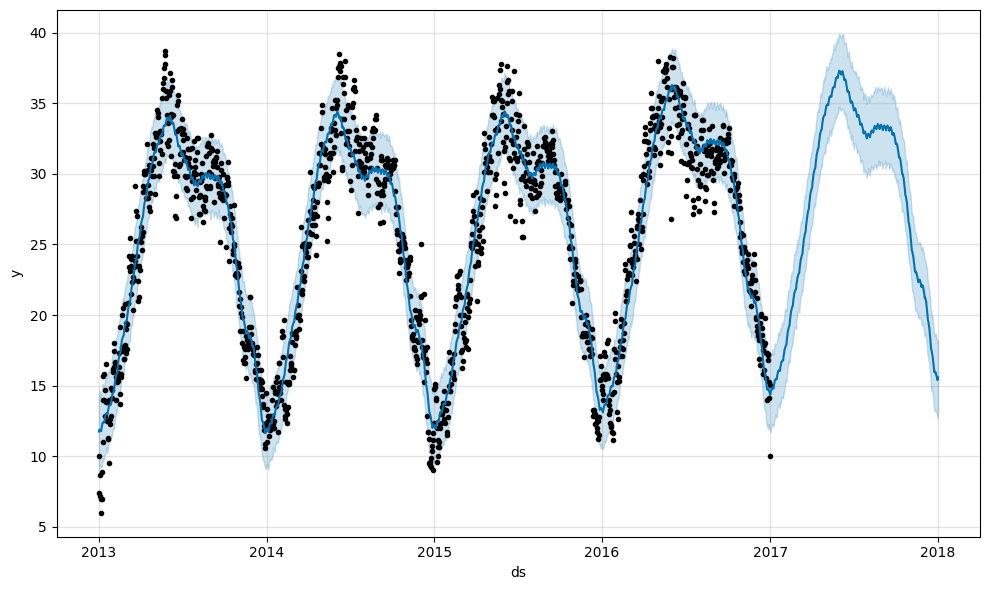

RMSE Prophet: 2.03077376741205


In [4]:

import matplotlib.pyplot as plt
from prophet import Prophet

# Resetando o índice para usar 'date' como uma coluna
df_prophet = train_data.reset_index()[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})

# Criar e treinar o modelo Prophet
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Fazer a predição para o futuro
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)

# Plotar a predição
model_prophet.plot(forecast)
plt.show()

# Calcular o erro RMSE para o Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Filtrar apenas os valores reais para comparação
y_true = df_prophet['y'].values
y_pred = forecast['yhat'][:len(y_true)].values

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE Prophet: {rmse_prophet}')


In [5]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiujxb2gy/ndtxp1p0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiujxb2gy/7g95cv92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30173', 'data', 'file=/tmp/tmpiujxb2gy/ndtxp1p0.json', 'init=/tmp/tmpiujxb2gy/7g95cv92.json', 'output', 'file=/tmp/tmpiujxb2gy/prophet_modellaup_umf/prophet_model-20241007034631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:46:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:46:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

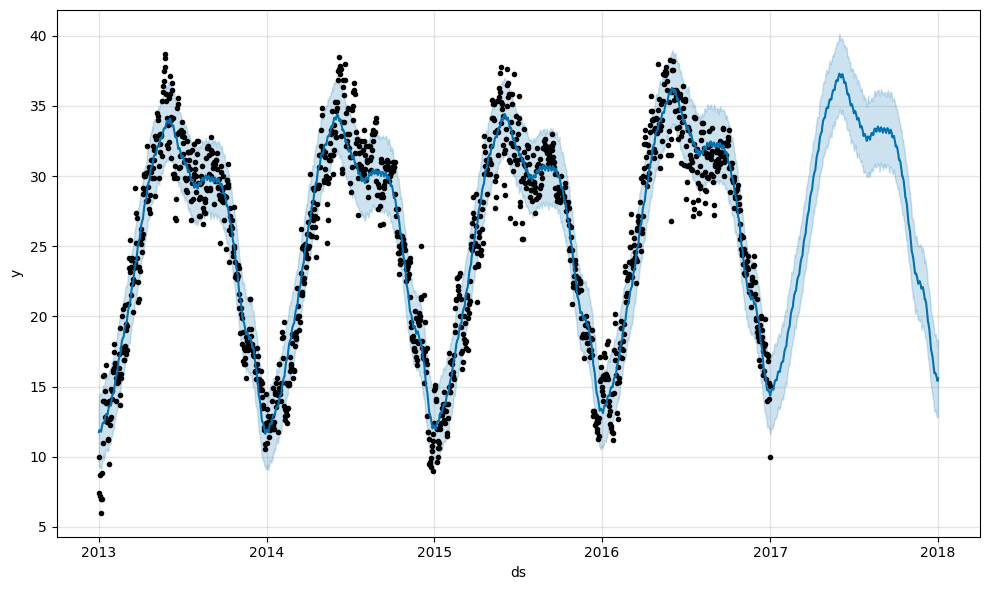

RMSE Prophet: 2.03077376741205


In [6]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Resetando o índice para usar 'date' como uma coluna
df_prophet = train_data.reset_index()[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})

# Criar e treinar o modelo Prophet
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Fazer a predição para o futuro
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)

# Plotar a predição
model_prophet.plot(forecast)
plt.show()

# Calcular o erro RMSE para o Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Filtrar apenas os valores reais para comparação
y_true = df_prophet['y'].values
y_pred = forecast['yhat'][:len(y_true)].values

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE Prophet: {rmse_prophet}')


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Escalar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['meantemp']])

# Criar o conjunto de dados para LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Definir o número de passos de tempo
time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)

# Redimensionar os dados para o formato [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Criar o modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32)

# Fazer previsões
train_predict = model_lstm.predict(X_train)

# Reverter a escala dos dados para a temperatura original
train_predict = scaler.inverse_transform(train_predict)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1122
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0052
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0048
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0046
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0049
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0051
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0047
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0044
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0042
Epoch 15/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0041
Epoc

In [8]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Escalar os dados para a LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data['meantemp'].values.reshape(-1, 1))

# Preparar os dados para a LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train, y_train = create_dataset(train_scaled, time_step)

# Redimensionar para [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Definir o modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Treinar o modelo
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Fazer previsões
train_predict = model_lstm.predict(X_train)

# Inverter a escala dos dados
train_predict = scaler.inverse_transform(train_predict)
train_true = scaler.inverse_transform([y_train])

# Calcular o RMSE para LSTM
rmse_lstm = np.sqrt(mean_squared_error(train_true[0], train_predict[:,0]))
print(f'RMSE LSTM: {rmse_lstm}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.2674
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0112
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0056
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0050
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0052
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0051
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046
Epoch 16/20
23/

In [9]:

# Comparação dos resultados entre Prophet e LSTM
print(f"RMSE LSTM: {rmse_lstm}")
print(f"RMSE Prophet: {rmse_prophet}")


RMSE LSTM: 2.2105402849076903
RMSE Prophet: 2.03077376741205



### Justificativa para a Escolha da Métrica RMSE

A métrica **Root Mean Squared Error (RMSE)** foi escolhida porque mede a diferença média entre os valores previstos pelo modelo e os valores reais, em unidades diretamente comparáveis aos dados. RMSE é amplamente utilizada em problemas de predição de séries temporais devido à sua sensibilidade a grandes erros. Como os erros são elevados ao quadrado antes de serem somados, o RMSE penaliza mais os grandes erros, tornando-o útil em situações onde se deseja minimizar desvios maiores.

Referência: [Kaggle - Model Evaluation Metrics](https://www.kaggle.com/learn/intro-to-machine-learning)
